# 1. Project Title: Drive Time Network Analysis of Opioid Overdose Locations in Mesa, Arizona

***

### Table of Contents
**David's Sections Done**
* [3. Questions Addressed](#sect3)
* [4. Background & Literature](#sect4)
* [5. Python Packages Used](#sect5)
* [6. Data Sources](#sect6)
* [7. Data Cleaning](#sect7)
* [8. Descriptive Statistics](#sect8)  - **IN PROGRESS: Marco**
* [9. Analysis](#sect9)                - **IN PROGRESS: Marco**
    * [9.1 Service Areas by Travel Time](#sect_9_1)
        * [9.1A: Addiction Treatment Clinics Service Areas by Drive Time](#sect_9_1A)
        * [9.1B: Fire + EMS Station Service Areas by Truck Time](#sect_9_1B)
    * [9.2 Location-Allocation Analysis](#sect_9_2) - **IN PROGRESS: Marco**
    * [9.3 Service Areas by Travel Time (with Candidate Locations)](#sect_9_3)
        * [9.3A: Addiction Treatment Clinics Service Areas by Drive Time](#sect_9_3A)
        * [9.3B: Fire + EMS Station Service Areas by Truck Time](#sect_9_3B)
* [10. Summary of Products and Results](#sect10) - **IN PROGRESS: Marco**
* [11. Discussion](#sect11)
* [12. Conclusions & Future Work](#sect11)

## 2. Team Members
Marco Morocho - A15585622<br>
David Davila-Garcia - A15642345

## 3. Question(s) you addressed, why it is important (5pt) <a class="anchor" id="sect3"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> As in your project proposal, describe the intended audience and the business case for finding a
solution to your question.<br><br>
If your question changed significantly compared to your project proposal, please explain.<br><br>
(at least 250 words):
</div>

<div class="alert alert-block alert-warning">
For our project, we sought to answer the following questions:

**1) Using GIS, how can we determine the accessibility of Addiction Treatment Facilities and Fire/EMS Stations in Mesa, AZ?**<br>
**2) Can we identify possible new locations for Addiction Treatment Facilities and Fire/EMS Stations to provide a better service area and minimize the number of Dead-On-Arrival (DOA) Overdoses?**

We hypothesize that as the travel time for opioid overdose medical services increases, the proportion of DOA overdoses (worst outcome) will also increase. According to literature, it takes approximately 1-3 hours from the time of consumption of excess opioids until death. As such, once someone has been identified as possibly overdosing, prompt medical treatment is essential. For our dataset, we included the 2 most used medical services for opioid overdose medical treatment: Addiction Treatment Facilities (patient self check-in) and Fire/EMS Stations (first responders). 

In order to answer the first question, we used the features module of the ArcGIS API for Python to construct Drive Time Areas towards all Addiction Treatment Facilities, and to construct Truck Time based Service Areas from all Fire/EMS Stations. From the Drive Time Areas and Service Areas, we can aggregate the number of overdose cases, and calculate the proportion of DOA overdoses for each area. From this information, we hope to find a possible connection between travel time and DOA overdose cases.

Our second question was framed as a Location-Allocation problem, such that we used the DOA overdose cases as the weight for our candidate locations. Three candidate locations for new Addiction Treatment Facilities and Fire/EMS Stations were chosen from all local government-owned vacant buildings. The hope is that the local government can optimally select new locations for Opioid Overdose Medical Services to minimize the number of DOA overdoses (worst outcome) and maximize the number of treated cases (best outcome).

The intended audience for this project is the local government of Mesa, AZ, and Addiction Treatment businesses looking to expand to new locations. The findings of this project would be beneficial for the local government and Addiction Treatment businesses to understand the scope of overdose cases in Mesa, and to explore candidate locations for new Addiction Treatment Facilites and Fire/EMS Stations. These candidate locations would be able to increase the accessibility to opioid treatment services, which we suspect would decrease the number of DOA overdose cases. As such, the overall goal of this project is to minimize the number of DOA overdoses and maximize the number of treatment cases.

Our project originally was focused on using a dataset for Naloxone Distribution Centers for the Drive Time Analysis. However, after receiving feedback from GIS experts, we made the decision to remove this dataset from our project and instead focus on analyzing Addiction Treatment Facilities and Fire/EMS Stations. The reasoning for this is that these two new data sources provide the majority of medical services to patients with opioid overdoses. While analysis of Naloxone Distribution Centers in relation to opioid overdose cases may lead somewhere, it is not feasible at the small scale of data that we are provided and for the types of analysis that we are conducting.
</div>

## 4. Background and Literature <a class="anchor" id="sect4"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> At least 4 bibliographic references (with links) relevant to your question. These don’t have to be
new references; you can continue what you started in your project proposal. As before, the
references can include research publications, online articles, blogs, github repos, online
applications, etc.<br><br>
As a new element of this section, reflect on how these references helped you specify the
problem more narrowly, or focus on a specific hypothesis, or question conclusions they made,
or improve over previously available code.<br><br>
(at least 200 words)
</div>

<div class="alert alert-block alert-warning">
<b>References:</b><br>
    
1. In this spatial analysis review, the primary focus was using demographic, socioeconomic, and geographic factors to determine how to better combat overdose deaths in Mesa AZ. This dataset was the inspiration for our project as we also looked into Mesa, Arizona and wanted to expand on their ideas: <br>
    link: https://yinaanyachebelu.github.io/opioid-overdoses-spatial-analysis/ <br><br>
    
2. In this article by the San Diego Addiction Treatment Center, it primarily provided an overview of the Opioid Epidemic in San Diego CA. It explains the problem at hand, history of the epidemic, current solutions, and future solutions. One of the possible solutions is providing more treament facilities to make them more accessible. This helped with the inspiration behind optimizing service area and introducing potential new locations with location-allocation.<br>
    link: https://sdtreatmentcenter.com/california-treatment/opioid-statistics/ <br>
<br>
3. This website by the cdc provides more information on the opioid crisis and links to more information on current solutions. It also displays the Opioid Dispensing Rate across counties and states.:<br>
    link: https://www.cdc.gov/drugoverdose/rxrate-maps/index.html <br>
<br>
4. A Geospatial analysis of overdose locations and naloxone distribution centers in New York. The main objective also serves as as inspiration to our work as they aim to use geospatial analysis to help maximize efficiency of nalaxone pharmacies and prescribers:<br>
    link: https://publichealth.jmir.org/2022/4/e32133 <br>
</div>

## 5. Python packages used <a class="anchor" id="sect5"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Make this a brief list – but also mention whether and how this list has evolved compared to the
project proposal.<br><br>
In your notebook: identify and describe the libraries as you import them, using a combination
of markdown and code cells.<br><br>
(at least 100 words)
</div>

<div class="alert alert-block alert-warning">
<b>Packages:</b><br>
    
- __Pandas__ - Used to perform data analysis, visualize spatially enabled dataframes (SEDF), and clean data. 
- __ArcGIS Features Analyze_Patterns module__ - Used to find hotspots from our dataset
- __ArcGIS Features Analysis Module__ - Used to merge_layers, overlay_layers/make sections, find_point_clusters
- __ArcGIS Features Use_Proximity Module__ - Used for constructing service areas (create_drive_time_areas)
- __ArcGIS Features Summarize_Data Module__ - Used to aggregate overdose case point data for each service area (aggregate_points)
- __ArcGIS Network Module__ - Used for finding the optimal locations for candidate locations based on demand of DOA overdose cases (solve_location_allocation)

</div>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import arcgis
from arcgis.gis import GIS
from arcgis import *

#from arcgis.geoenrichment import *
#from arcgis.geometry import *
#from arcgis.features import FeatureLayerCollection, Feature, FeatureSet
from arcgis import features


#from arcgis.geocoding import geocode
#import arcgis.network as network
from arcgis.features.use_proximity import create_drive_time_areas

import matplotlib.pyplot as plt
arcgis.__version__

'2.0.1'

In [2]:
username = input('D for David, M for Marco:')
if username == 'D':
    #ArcGIS Enterprise
    #gis = GIS('https://gis-portal.ucsd.edu/portal', 'ddavilag@ad')
    #ArcGIS Online
    agol = GIS(username = 'dsc170wi23_9')
elif username == 'M':
    #ArcGIS Enterprise
    #gis = GIS('https://gis-portal.ucsd.edu/portal', 'mmorocho@ad')
    #ArcGIS Online
    agol = GIS(username="dsc170wi23_24")

D for David, M for Marco:D


## 6. Data sources (10pt) <a class="anchor" id="sect6"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Include a URL and a one-sentence description of each source you used. Make sure you have
enough records for your machine learning application.<br><br>
Please reflect on how your choice of sources evolved since the proposal phase, and any
concerns about the sources you used - related to data quality, provenance, access constraints,
etc. Also, reflect on any data that would be helpful to address your research question, which
you could not obtain (and why). Be creative! There is a lot of additional information, sometimes
from less traditional sources, that may help.<br><br>
When you create a notebook, identify and describe the datasets as you load them. If the
sources are in AGOL, provide source IDs, and/or load them using gis.content.get. Provide
additional discussion in a markdown cell.<br><br>
(at least 200 words)
</div>

<div class="alert alert-block alert-warning">
<b>TODO:</b> (Marco) Current Word Count: 54. Add Data for Fire/EMS Stations, Government Vacant Lots.
</div>

https://data.mesaaz.gov/Fire-and-Medical/Fire-and-Medical-Opioid-Overdose-Incidents/qufy-tzv6/explore
<br>One-sentence description: Dataset of opioid overdose in Mesa Arizona containing 7,970 rows and 18 columns of information regarding the location of the overdose, patient information, and final outcome.

https://ucsdonline.maps.arcgis.com/home/item.html?id=102602c5f0704bd08296034cdd4c9159
<br>
One-sentence description: Data from SAMHSA Behavioral Health Treatment Service Locator which includes both SAMHSA approved and non-approved treatment facilities that prescribe MAT (medication assisted treatment).

**TODO: Add Data for Fire/EMS Locations** 
<br>
One-sentence description: 

**TODO: Add Data for Government Vacant Lot Locations** 
<br>
One-sentence description: 

In [ ]:
od_fc = agol.content.get('a88be1ddd9914a3d836f3ebf0f0d944d')
clinics = agol.content.get("4fc46ec10ac042d6b826a268d5e46f82")
ems = agol.content.get("9b27a30d79384ad6a8aa2f4e7e49dfbc")

## 7. Data cleaning you have done (10pt) <a class="anchor" id="sect7"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Describe the cleaning/wrangling operations that you performed, and whether you realized you
needed to clean the data by examining metadata documents or by introspecting the data itself.
Was the amount of cleaning/data preparation similar to what you expected when writing
project proposal?<br><br>
Organize the discussion and code as a combination of markdown and code cells.<br><br>
(at least 100 words – less if you didn’t have to do any cleaning!)
</div>
<div class="alert alert-block alert-warning">
For data cleaning, all of the datasets were clean except for the provided opioid overdose case data. For this specific dataset, we had to convert the dataset from a csv to an SEDF by using Latitude and Longitude columns. Then we inspected the data and noticed there were rows with null geometries. As such, we removed these rows. In addition, we created a binary column called "DOA": a value of 1 means the case resulted in Dead-On-Arrival, whereas a value of 0 contains every other possible value. This column will be used for our analysis section.<br><br> After cleaning the opioid overdose data, we set the extent of all other datasets (Addiction Treatment Clinics, Fire/EMS Stations) to 60 miles drive of the opioid overdose layer. This is because these datasets originally contained data for the entire nation, but we only wanted data which was spatially relevant to our opioid case dataset. This was done manually through the ArcGIS Online Map GUI, since it was much easier to visualize. 
</div>

In [3]:
od_fl = od_fc.layers[0]
od_sdf = od_fl.query().sdf
od_sdf.head(3)

,Incident_Date,Day_of_Week,Month,Year,Time_of_Day,Opioid_Overdose_Review,Treatment_or_Medication_Given,Patient_Age,Gender,Incident_Disposition,...,Unit_Name,PD_Narcan,PD_Save,Complaint_Reported_by_Dispatch,Incident_ID,Mesa_Census_Tracts_2,Mesa_Census_Tracts_To_City_Boun,Mesa_Census_Tracts_To_City_Bo_1,ObjectId,SHAPE
0,2018-11-18 00:03:31,Saturday,Nov,2018,Afternoon,true,Naloxone 2mg/2mL,25-29,Male,Treated/Transported with Medic Ride-in,...,E203,False,False,OD,F2018091136,16.0,16.0,16.0,1,"{""x"": -12450528.447773682, ""y"": 3947851.741028..."
1,2018-12-08 07:17:38,Saturday,Dec,2018,Overnight,true,None,25-29,Male,Treated/Transported with Medic Ride-in,...,E204,False,False,OD,F2018096920,14.0,10.0,10.0,2,"{""x"": -12453311.435043514, ""y"": 3947851.741028..."
2,2019-04-28 03:43:22,Saturday,Apr,2019,Evening,true,Naloxone 2mg/2mL,20-24,Female,Treated/Transported with Medic Ride-in,...,MR205,False,False,OD,F2019035337,45.0,44.0,44.0,3,"{""x"": -12443849.278326085, ""y"": 3951185.555109..."


In [4]:
#dropping values with null geometries
od_sdf = od_sdf[~(od_sdf.SHAPE.isnull())]
od_sdf.reset_index(inplace=True,drop=True)
od_sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Incident_Date                    7955 non-null   datetime64[ns]
 1   Day_of_Week                      7955 non-null   object        
 2   Month                            7955 non-null   object        
 3   Year                             7955 non-null   int64         
 4   Time_of_Day                      7955 non-null   object        
 5   Opioid_Overdose_Review           7955 non-null   object        
 6   Treatment_or_Medication_Given    4785 non-null   object        
 7   Patient_Age                      7955 non-null   object        
 8   Gender                           7945 non-null   object        
 9   Incident_Disposition             7955 non-null   object        
 10  Latitude                         7955 non-null   float64    

In [5]:
od_sdf['PD_Save'].value_counts()

False    7275
True       48
Name: PD_Save, dtype: int64

In [6]:
od_sdf['DOA'] = od_sdf['Incident_Disposition'].apply(lambda x: 1 if 'DOA' in x else 0)
od_sdf['DOA'].value_counts()

/tmp/ipykernel_348/3392527183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  od_sdf['DOA'] = od_sdf['Incident_Disposition'].apply(lambda x: 1 if 'DOA' in x else 0)


0    5155
1    2800
Name: DOA, dtype: int64

In [7]:
try:
    # Title: MesaOD_Cleaned | Type: Feature Service | Owner: dsc170wi23_9
    od = agol.content.get("179bb2a8da744514b7b406ab200a2719")
    od_fl = od.layers[0]
    print('From AGOL')
except:
    od_fl = od_sdf.spatial.to_featurelayer('MesaOD_Cleaned',gis=agol)
    print('To AGOL')
od_sdf = od_fl.query().sdf

From AGOL


In [8]:
# Title: Intersect_of_MATFacilities_and_mat_az | Type: Feature Service | Owner: dsc170wi23_24
clinics_fl = clinics.layers[0]
clinics_sdf = clinics_fl.query().sdf
clinics_sdf.head(3)

,OBJECTID,Join_Count,TARGET_FID,ID_1,name1_1,name2_1,street1_1,street2_1,city_1,state_1,...,f43_1,f47_1,f66_1,f67_1,f70_1,f81_1,f92_1,n24_1,n40_1,SHAPE
0,1,1,6851,11719,Community Bridges Inc,Transition Point Residential,5734 East Hope Lane,,Globe,AZ,...,,0,,0,,,0,,,"{""x"": -110.81392199999999, ""y"": 33.40272600000..."
1,2,1,6852,11721,Canyonlands Community Healthcare,Globe,5860 South Hospital Drive,Suite 102,Globe,AZ,...,,0,,0,,,0,,,"{""x"": -110.82661318799995, ""y"": 33.40727531300..."
2,3,1,6853,11720,Community Bridges Inc,Globe Outpatient Services Center,5734 East Hope Lane,,Globe,AZ,...,,0,,0,,,0,,,"{""x"": -110.81392199999999, ""y"": 33.40272600000..."


In [9]:
clinics_sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 246 entries, OBJECTID to SHAPE
dtypes: float64(2), geometry(1), int32(208), int64(1), object(34)
memory usage: 116.6+ KB


In [10]:
# Title: Fire_Stations_EMS_Stations_and_emergency_services | Type: Feature Service | Owner: dsc170wi23_24
ems_fl = ems.layers[0]
ems_sdf = ems_fl.query().sdf
ems_sdf.head(3)

,OBJECTID,Join_Count,TARGET_FID,PERMANENT_IDENTIFIER,SOURCE_FEATUREID,SOURCE_DATASETID,SOURCE_DATADESC,SOURCE_ORIGINATOR,DATA_SECURITY,DISTRIBUTION_POLICY,...,ADMINTYPE,ADDRESSBUILDINGNAME,ADDRESS,CITY,STATE,ZIPCODE,GNIS_ID,FOOT_ID,COMPLEX_ID,SHAPE
0,1,1,700615,{193839F9-8DCB-4225-9200-160832504520},None,f12e209c-c49c-465a-96a1-30351bf68084,740 TNMC Update 3/24/2019,U.S. Geological Survey,5,E4,...,NaN,None,7816 East University Drive,Mesa,AZ,85207,2672541,None,None,"{""x"": -12430234.625899997, ""y"": 3951556.275500..."
1,2,1,700616,{D6A2D56C-8ADA-41BF-B627-7A62E7BAB4F9},None,80eb208f-c0a5-4ed8-b134-04b3f4223b74,740 TNMC Update 3/25/2019,U.S. Geological Survey,5,E4,...,NaN,None,5950 East Virginia Street,Mesa,AZ,85215,2672542,None,None,"{""x"": -12434604.862399997, ""y"": 3958869.784999..."
2,3,1,700627,{48871064-9942-4828-BAB9-14C750D6369E},None,d3f87c29-ae37-40a7-a2ee-3e4c79428b2e,740 TNMC Update 5/8/2019,U.S. Geological Survey,5,E4,...,NaN,None,5400 South McClintock Drive,Tempe,AZ,85283,2672600,None,None,"{""x"": -12457881.8794, ""y"": 3945222.971600011, ..."


In [11]:
ems_sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   OBJECTID              102 non-null    int64         
 1   Join_Count            102 non-null    int64         
 2   TARGET_FID            102 non-null    int64         
 3   PERMANENT_IDENTIFIER  102 non-null    object        
 4   SOURCE_FEATUREID      12 non-null     object        
 5   SOURCE_DATASETID      102 non-null    object        
 6   SOURCE_DATADESC       102 non-null    object        
 7   SOURCE_ORIGINATOR     102 non-null    object        
 8   DATA_SECURITY         102 non-null    int64         
 9   DISTRIBUTION_POLICY   102 non-null    object        
 10  LOADDATE              102 non-null    datetime64[ns]
 11  FTYPE                 102 non-null    int64         
 12  FCODE                 102 non-null    int64         
 13  NAME                

## 8. Descriptive statistics for the data (10pt) <a class="anchor" id="sect8"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Explore the data using maps, charts, and common descriptive statistics. Sample questions you
can try to answer: is there spatial autocorrelation in the data? Are you dealing with random
point patterns? What is the spatial mean and standard distance? Or why the above questions
are not relevant to your research theme and the data?<br><br>
(a combination of markdown and documented code cells)
</div>

In [12]:
# Map of Overdose Cases
map_overdoses = agol.map('Mesa')
od_sdf.spatial.plot(map_widget=map_overdoses,
                    renderer_type = 's',
                    symbol_type='simple',
                    colors='Reds_r',
                    outline_style='s',
                    outline_color=[0,0,0,0],
                    marker_size=5,
                    alpha=0.1
                   )
map_overdoses

MapView(layout=Layout(height='400px', width='100%'))

This map was created to better understand the spatial distribution of overdose cases. In the map above, we see that each of the overdose points are equally spaced by approximately 1/3 mile. Darker points correspond to higher raw counts of overdoses found in each (1/3 mile)^2 area. It is shown that there are a higher concentration of overdoses in downtown Mesa.

In [13]:
map_DOA = agol.map('Mesa')
od_sdf.spatial.plot(map_widget=map_DOA,
               renderer_type='c',  # for class breaks renderer
               class_count=2,  # choose the number of classes
               col='DOA',  # numeric column to classify
               cmap='Paired',  # color map to pick colors from for each class
               outline_color=[0,0,0,0],
               marker_size=5,
               alpha=0.9  # specify opacity
               )
map_DOA.legend = True
map_DOA

MapView(layout=Layout(height='400px', width='100%'), legend=True)

**TODO: (Marco)**

In [14]:
# Map of Addiction Treatment Clinics
map_clinics = agol.map('Mesa')
clinics_sdf.spatial.plot(map_widget=map_clinics,
                    renderer_type = 's',
                    symbol_type='simple',
                    symbol_style='d',
                    colors='Greens_r',
                    outline_style='s',
                    outline_color=[0,100,255,150],
                    marker_size=5,
                    alpha=1
                   )
map_clinics

MapView(layout=Layout(height='400px', width='100%'))

This map was created to visualize the spatial distribution of Addiction Treatment Clinics within 60 miles driving of our Opioid Overdose Dataset. We can see that there appears to be a cluster of clinics in the heart of downtown Mesa. 

In [15]:
map_ems = agol.map('Mesa')
ems_sdf.spatial.plot(map_widget=map_ems,
                    renderer_type = 's',
                    symbol_type='simple',
                    symbol_style='+',
                    colors='Greens_r',
                    outline_style='s',
                    outline_color=[0,255,45,150],
                    marker_size=5,
                    alpha=1
                   )
map_ems

MapView(layout=Layout(height='400px', width='100%'))

**TODO: (Marco)**

In [16]:
map_all = agol.map('Mesa')
od_sdf.spatial.plot(map_widget=map_all,
                    renderer_type = 's',
                    symbol_type='simple',
                    colors='Reds_r',
                    outline_style='s',
                    outline_color=[0,0,0,0],
                    marker_size=5,
                    alpha=0.1
                   )
ems_sdf.spatial.plot(map_widget=map_all,
                    renderer_type = 's',
                    symbol_type='simple',
                    symbol_style='+',
                    colors='Greens_r',
                    outline_style='s',
                    outline_color=[0,255,45,150],
                    marker_size=5,
                    alpha=1
                   )
clinics_sdf.spatial.plot(map_widget=map_all,
                    renderer_type = 's',
                    symbol_type='simple',
                    symbol_style='d',
                    colors='Greens_r',
                    outline_style='s',
                    outline_color=[0,100,255,150],
                    marker_size=5,
                    alpha=1
                   )
map_all

MapView(layout=Layout(height='400px', width='100%'))

In this map, we show the outputs from the three previous maps. In red, we have the opioid overdose locations. In green, we have the Fire/EMS Stations within 60 miles driving of the opioid overdose cases. In Blue, we have the Addiction Treatment Clinics within 60 miles driving of the opioid overdose cases. If you zoom into Mesa, it can be seen that the Fire/EMS Stations appear to be much more evenly spaced compared to the Addiction Treatment Clinics. In addition, it appears that there are few addiction clinics outside of Downtown Mesa. As such, we suspect that overdose cases in Eastern Mesa would have to drive further to receive medical care.

In [17]:
# Heatmap of Overdose data
try:
    od_hotspot = agol.content.get("c553c962c3234d25a3d3c4f55bdf89e9")
    print('From AGOL')
    
except:
    hot_spots = find_hot_spots(od_fl,output_name='OverdoseHotSpots')
    print('To AGOL')
    
map_hotspots = agol.map('Mesa')
map_hotspots.add_layer(od_hotspot)
map_hotspots.legend = True
map_hotspots

From AGOL


MapView(layout=Layout(height='400px', width='100%'), legend=True)

**TODO: (Marco)**

In [18]:
# Heatmap of Overdoses that lead to a DOA
doa_fl = agol.content.get('5a0529106cf1468ba85a4ece41d5ac30')
try:
    doa_od_hotspot = agol.content.get("82993577f6614fa9879418db30c0ce86")
    print('From AGOL')
    
except:
    doa_hot_spots = find_hot_spots(doa_fl,output_name='DOA_OverdoseHotSpots')
    print('To AGOL')

doa_map_hotspots = agol.map('Mesa')
doa_map_hotspots.add_layer(doa_od_hotspot)
doa_map_hotspots.legend = True
doa_map_hotspots

From AGOL


MapView(layout=Layout(height='400px', width='100%'), legend=True)

We created this heatmap to display the spatial distribution of Dead-On-Arrival (DOA) overdose cases in Mesa, AZ. We can see that there appears to be a high concentration of DOA cases in downtown Mesa, and on the western border shared with Tempe. In addition, it can be seen that the eastern and northern boundaries of Mesa appear to be Cold spots for DOA cases. It is notable that the middle of Mesa appears to be a hot spot for DOA overdose cases, since in the previous map this area was not characterized as a hot-spot. Perhaps there are not enough Addiction Treatment Clinics or Fire/EMS Stations near this hotspot... We will investigate this later on in the notebook.

In [19]:
# Heatmap of Addiction Clinics data
try:
    clinic_clusters = agol.content.get("45f06f6861b24df8aa9acb1d34df2006")
    print('From AGOL')
    
except:
    clinic_clusters = arcgis.features.analysis.find_point_clusters(clinics_fl,
                              min_features_cluster=5,
                              output_name='find_addiction_clinic_clusters_2',gis=agol)
    print('To AGOL')
    
map_clinic_clusters = agol.map('Mesa')
map_clinic_clusters.add_layer(clinic_clusters)
map_clinic_clusters.legend= True
map_clinic_clusters

From AGOL


MapView(layout=Layout(height='400px', width='100%'), legend=True)

**TODO: (Marco)**

In [20]:
# Heatmap of Fire + EMS Station Data
try:
    ems_fire_clusters = agol.content.get("344cf9fa1cfe4d6682ebc874b0c61bd8")
    print('From AGOL')
    
except:
    ems_fire_clusters = arcgis.features.analysis.find_point_clusters(ems_fire_fl,
                              min_features_cluster=3,
                              output_name='find_ems_fire_clusters',gis=agol)
    print('To AGOL')
    
map_ems_clusters = agol.map('Mesa')
map_ems_clusters.add_layer(ems_fire_clusters)
map_ems_clusters.legend= True
map_ems_clusters

From AGOL


MapView(layout=Layout(height='400px', width='100%'), legend=True)

**TODO: (Marco) is this the map that we wanted?**<br>
For this map, we computed clusters for the Fire/EMS Data and visualized the results.

<AxesSubplot:>

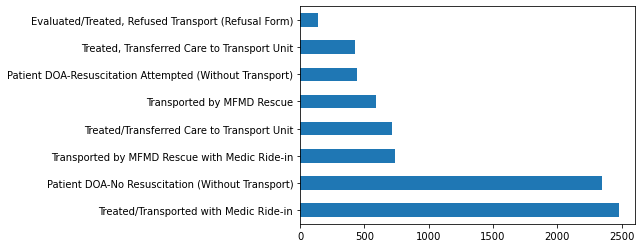

In [21]:
od_sdf.Incident_Disposition.value_counts()[:8].plot.barh()

**TODO: (Marco)**

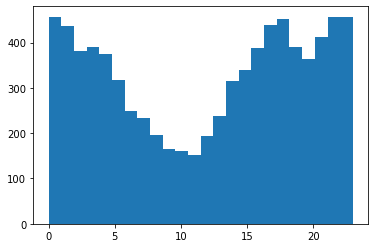

In [22]:
times = (od_sdf.Incident_Date.dt.time)
hours = []
hours = [i.hour for i in times]
plt.hist(hours, bins = 24)
plt.show()

From this histogram we can see the distribution of the number of overdose cases reported by the hour of day. Even though we did not use temporal analysis for this project, we found it interesting that most of the overdose cases occur either very early in the morning or late at night. This plot could be used to inspire a future research direction.

## 9. Analysis (25pt) <a class="anchor" id="sect9"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Provide a general outline of your analysis (in a markdown), and then document it step by step
as you code the solution. Please make sure that we can reproduce your analysis by running
your notebook. As before, a diagram describing your workflow would be helpful.<br><br>
Please also reflect on how your actual analysis steps were different compared to your project
proposal - or state that you didn’t deviate from the initial plan.<br><br>
(a combination of markdown and documented code cells)<br><br>
(at least 500 words)
</div>

<div class="alert alert-block alert-warning">
<b>Diagram of Analysis:</b><br><br>
For the analysis tasks, we created service areas by drive times for both the Addiction Treatment Clinics and the Fire + EMS Stations in Mesa, AZ. In addition, we aggregated the Overdose Case Points by Service area, and computed the proportion of DOA overdose cases by Service Area. Moreover, using DOA overdose case locations as the demand, we performed location-allocation analysis to identify 3 candidate locations for both new Addiction Treatment Clinics and the Fire + EMS Stations in Mesa, AZ. Lastly, we merged the new candidate locations with the original Addiction Treatment Clinics and the Fire + EMS Stations and reconstructed the service areas by drive times. Thus, in the Summaries Section, we are able to compare the change in the service areas as a result of adding the 3 new candidate locations. We did not deviate from our initial plan for the analysis section.
    
- <b>9.1: Service Areas by Drive Time</b>: Use the example provided in this link (https://developers.arcgis.com/python/samples/drive-time-analysis-for-opioid-epidemic/) to create drive time service areas. The break values for the service areas will be [5, 10, 15, 20, 30, and 45 minutes].
    - <b>9.1A: Addiction Treatment Facilities Service Areas by Drive Time</b>
        - Step 1: Get the Feature Layer for the Addiction Treatment Clinics in Mesa, AZ (Done in Data Cleaning Section)
        - Step 2: Generate areas served based on the time it takes to drive towards the Addiction Treatment Clinics (create_drive_time_areas). This simulates overdose patients driving to the addiction treatment clinics for medical treatment.
        - Step 3: Map it!
        - Step 4: Aggregate the Overdose Point Feature Layer by the Addiction Treatment Clinic's Service Areas Feature Layer (aggregate_points). Compute mean of binary Dead-On-Arrival (DOA) column for overdose cases within each Service Area. The mean of this binary column tells us the proportion of overdose cases within each service area that resulted in DOA. 
    - <b>9.1B: Fire + EMS Station Service Areas by Truck Time</b>
        - Step 1: Get the Feature Layer for the Fire + EMS Stations in Mesa, AZ (Done in Data Cleaning Section)
        - Step 2: Generate areas served based on the time it takes to drive a truck away from the Fire + EMS Stations (create_drive_time_areas). This simulates the travel of emergency vehicles that first responders use. 
        - Step 3: Map it!
        - Step 4: Aggregate the Overdose Point Feature Layer by the Fire + EMS Station's Service Areas Feature Layer (aggregate_points). Compute mean of binary Dead-On-Arrival (DOA) column for overdose cases within each Service Area. The mean of this binary column tells us the proportion of overdose cases within each service area that resulted in DOA. 
- <b>9.2: Location-Allocation Analysis</b>
- <b>9.3: Service Areas by Drive Time with Candidate Locations</b>
    - <b>9.3A: Addiction Treatment Facilities Service Areas by Drive Time with Candidate Locations</b>
        - Step 1: Get the feature layer of the 3 Chosen Candidate Addiction Treatment Clinics (from 9.2: Location-Allocation Analysis) 
        - Step 2: Merge the 3 Candidate Clinics feature layer with the already existing Addiction Treatment Clinics feature layer
        - Step 3: Repeat Steps 1-4 in Section 9.1A but using the merged Addiction Clinic feature layer
    - <b>9.3B: Fire + EMS Station Service Areas by Truck Time with Candidate Locations</b>
        - Step 1: Get the feature layer of the 3 Chosen Candidate Fire + EMS Stations (from 9.2: Location-Allocation Analysis) 
        - Step 2: Merge the 3 Candidate Stations feature layer with the already existing Fire + EMS Stations feature layer
        - Step 3: Repeat Steps 1-4 in Section 9.1A but using the merged Fire + EMS stations feature layer
</div>

### 9.1: Service Areas by Drive Time <a class="anchor" id="sect_9_1"></a>

#### 9.1A: Addiction Treatment Facilities Service Areas by Drive Time (5, 10, 15, 20, 30, 45 mins) <a class="anchor" id="sect_9_1A"></a>

Step 1: Already completed in data cleaning section<br>
Step 2: Use the create_drive_time_areas function from the Features Use_Proximity Module in ArcGIS
- Takes in addiction clinics feature layer as input, along with the breaks in minutes, and outputs a feature layer with areas
- We converted the output feature layer as an SEDF in the cell below

In [23]:
try:
    drive_times_clinics = agol.content.get("afbea59feadf4132981b3fe8e73faf15")
    drive_times_clinics_fl = drive_times_clinics.layers[0]
    print('From AGOL')
    
except:
    drive_times_clinics_fl = create_drive_time_areas(clinics_fl, 
                                            break_values = [5,10,15,20,30,45],
                                            break_units = 'Minutes',
                                            travel_mode = 'Driving Time',
                                            travel_direction = 'TowardsFacility',
                                            output_name='DriveTimeToClinics',
                                            overlap_policy='Dissolve')
    print('To AGOL')
    
drive_times_clinics_sdf = drive_times_clinics_fl.query().sdf
drive_times_clinics_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,SHAPE
0,1,30 - 45,30,45,None,1892.150227,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.301705,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.582794,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,711.287731,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.892474,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,452.456418,"{""rings"": [[[-111.912728847, 33.632517319], [-..."


Step 3: Mapping the Result. This map is interpretted in the Summaries section below.

In [24]:
map_drive_time_clinics = agol.map('Mesa')
map_drive_time_clinics.add_layer(drive_times_clinics_fl)
map_drive_time_clinics.add_layer(od_fl)
map_drive_time_clinics

MapView(layout=Layout(height='400px', width='100%'))

Step 4: aggregating all of the overdose points by each service area for addiction clinics. Compute the mean of the binary DOA column to give a percent for each service area. See the table below for the result. Interpretted in the Summaries section below.

In [25]:
try:
    # Title: Agg_OD_DriveTimeClinics | Type: Feature Service | Owner: dsc170wi23_9
    agg_od_clinics = agol.content.get('f642121025ab4c13a1124514fd056f34')
    print('From AGOL')
    
except:
    agg_od_clinics = features.summarize_data.aggregate_points(point_layer=od_fl,
                                                            polygon_layer=drive_times_clinics_fl,
                                                            summary_fields=['DOA mean', 'DOA stddev', 'DOA sum'],
                                                            output_name='Agg_OD_DriveTimeClinics'
                                                           )
    print('To AGOL')
    
agg_od_clinics_fl = agg_od_clinics.layers[0]
agg_od_clinics_sdf = agg_od_clinics_fl.query().sdf
agg_od_clinics_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,std_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1892.150227,NaN,NaN,0,0,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.301705,NaN,NaN,0,0,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.582794,0.514286,0.507093,18,35,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,711.287731,0.435540,0.496694,125,287,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.892474,0.449446,0.497600,689,1533,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,452.456418,0.322623,0.467518,1968,6100,"{""rings"": [[[-111.913851736, 33.6327418970001]..."


#### 9.1B: Fire + EMS Station Service Areas by Truck Time (5, 10, 15, 20, 30, 45 mins) <a class="anchor" id="sect_9_1B"></a>

Step 1: Already completed in data cleaning section<br>
Step 2: Use the create_drive_time_areas function from the Features Use_Proximity Module in ArcGIS
- Takes in Fire + EMS Stations feature layer as input, along with the breaks in minutes, and outputs a feature layer with service areas
- We converted the output feature layer as an SEDF in the cell below

In [26]:
try:
    # Title: TruckTimeFromStations | Type: Feature Service | Owner: dsc170wi23_9
    truck_times_ems = agol.content.get("a23d067ffb2e425ea429a8e1ed76f70d")
    print('From AGOL')
    
except:
    truck_times_ems = create_drive_time_areas(ems_fl, 
                                            break_values = [5,10,15,20,30,45],
                                            break_units = 'Minutes',
                                            travel_mode = 'Trucking Time',
                                            travel_direction = 'AwayFromFacility',
                                            output_name='TruckTimeFromStations',
                                            overlap_policy='Dissolve')
    print('To AGOL')
    
truck_times_ems_fl = truck_times_ems.layers[0]
truck_times_ems_sdf = truck_times_ems_fl.query().sdf
truck_times_ems_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,SHAPE
0,1,30 - 45,30,45,None,1818.702395,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.751956,"{""rings"": [[[-12501742.7887, 3960813.1574], [-..."
5,6,0 - 5,0,5,None,562.158450,"{""rings"": [[[-12476942.9022, 3934223.8948], [-..."


Step 3: Mapping the Result. This map is interpretted in the Summaries section below.

In [27]:
map_truck_time_ems = agol.map('Mesa')
map_truck_time_ems.add_layer(truck_times_ems_fl)
map_truck_time_ems.add_layer(od_fl)
map_truck_time_ems

MapView(layout=Layout(height='400px', width='100%'))

Step 4: aggregating all of the overdose points by each service area for Fire + EMS Stations. Compute the mean of the binary DOA column to give a percent for each service area. See the table below for the result. Interpretted in the Summaries section below.

In [28]:
try:
    # Title: Agg_OD_TruckTimeStations | Type: Feature Service | Owner: dsc170wi23_9
    agg_od_ems = agol.content.get('0a926256e5c54dabbbf28ebba41524ff')
    print('From AGOL')
    
except:
    agg_od_ems = features.summarize_data.aggregate_points(point_layer=od_fl,
                                                          polygon_layer=truck_times_ems_fl,
                                                          summary_fields=['DOA mean', 'DOA sum'],
                                                          output_name='Agg_OD_TruckTimeStations'
                                                         )
    print('To AGOL')
    
agg_od_ems_fl = agg_od_ems.layers[0]
agg_od_ems_sdf = agg_od_ems_fl.query().sdf
agg_od_ems_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1818.702395,NaN,0,0,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,NaN,0,0,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,NaN,0,0,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,0.500000,1,2,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.751956,0.516484,141,273,"{""rings"": [[[-12501817.7884, 3960933.0673], [-..."
5,6,0 - 5,0,5,None,562.158450,0.346094,2658,7680,"{""rings"": [[[-12478167.8966, 3934223.8948], [-..."


### 9.2: Location-Allocation on DOA Overdose Cases <a class="anchor" id="sect_9_2"></a>

Now that we have the DOA-only cases, we can run the location-allocation function. We chose to perform the functions on ArcGIS Online Mapviewer. The necessary steps we took will be listed below. 


In order to perform the Location-Allocation function, we first had to prepare the **Demand Locations**, **Candidate** and **Required** points.


1. The Demand Locations Layer should contain the points representing location that have demand for facilities. In this case, it'd be the Overdose cases. 
2. The Required Facilities points should contain the locations of facilities that already exist.
3. The Candidate Facilities points should contain the locations of facilities that can represent the new facility locations.

The required facilities are the existing Addiction Treatment Centers. However, for our candidate locations, we found the vacant properties in Mesa Arizona using an existing Mesa City Owned Property dataset.

We went with the Minimize travel functions as time is crucial when a person overdoses. We are hoping to provide the best locations for services that take under an hour to reach.


**TODO: (Marco) fix this**
![Screen%20Shot%202023-03-21%20at%201.38.43%20PM.png](attachment:Screen%20Shot%202023-03-21%20at%201.38.43%20PM.png)

We chose the Demand to Facility as overdose patients need to be taken to the Addiction Centers. We also set the time to 30 minutes as a person can die from an overdose as soon as one hour.


**TODO: (Marco) fix this**
![Screen%20Shot%202023-03-21%20at%201.41.59%20PM.png](attachment:Screen%20Shot%202023-03-21%20at%201.41.59%20PM.png)

The above-mentioned Required and Candidate Facilities were used to produce three new allocation points that did not previously exist as Addiction Treatment Centers. The three new locations can be seen below.


**TODO: (Marco) fix this**
![AllocatedPoints.png](attachment:AllocatedPoints.png)

The same process was done with Police Stations near Mesa, Arizona. 


**TODO: (Marco) fix this**
![Screen%20Shot%202023-03-21%20at%205.50.06%20PM.png](attachment:Screen%20Shot%202023-03-21%20at%205.50.06%20PM.png)

### 9.3: Service Areas by Drive Time with Candidate Locations <a class="anchor" id="sect_9_3"></a>

#### 9.3A: Addiction Treatment Facilities Service Areas by Drive Time with Candidate Locations (5, 10, 15, 20, 30, 45 mins) <a class="anchor" id="sect_9_3A"></a>

Step 1: Getting the Feature Layer containing the 'Chosen' candidate locations for addiction treatment clinics from Section 9.2: Location-Allocation Analysis

In [29]:
# Title: New_Assigned_facilities_for_DOAs_Vacants_Section_1 | Type: Feature Service | Owner: dsc170wi23_24
candidate_clinic_sites = agol.content.get("dacd84d69e184050b240351e2fe92e6a")
candidate_clinic_sites_fl = candidate_clinic_sites.layers[0]
candidate_clinic_sites_sdf = candidate_clinic_sites_fl.query().sdf
candidate_clinic_sites_sdf = candidate_clinic_sites_sdf[candidate_clinic_sites_sdf['FacilityType']=='Chosen']
candidate_clinic_sites_sdf

,OBJECTID,FacilityType,Capacity,DemandCount,AllocatedDemand,SourceID,SourceOID,PosAlong,SideOfEdge,SnapX,...,Deed_Date,Purchase_D,Square_Fee,Facility_N,Date_Acqui,Deed_Numbe,APN,Mesa_Refer,Council_Di,SHAPE
30,31,Chosen,2147483647,296,296,1,10977425,0.412038,2,-111.841471,...,06/03/1988 12:00:00 AM,06/03/1988,6109.0,Possible future well site,06/03/1988 12:00:00 AM,880270717,13559005,NaN,6.0,"{""x"": -12450135.6566, ""y"": 3951487.3871000037,..."
32,33,Chosen,2147483647,123,123,1,11009911,0.222727,1,-111.678427,...,04/07/1989 12:00:00 AM,04/07/1989,318816.0,Future Transportation Facility Site,04/07/1989 12:00:00 AM,890158647,21810002D,NaN,5.0,"{""x"": -12431979.5588, ""y"": 3952637.6893000007,..."
37,38,Chosen,2147483647,134,134,1,10996526,0.415415,1,-111.702969,...,05/27/1988 12:00:00 AM,05/27/1988,91345.0,Excess Property,05/27/1988 12:00:00 AM,880257803,14178820,NaN,5.0,"{""x"": -12434717.6001, ""y"": 3952657.7739000022,..."


In [30]:
try:
    candidate_clinic_sites = agol.content.get('0d234b0557ce48c59a67502adc28fb79')
    print('From AGOL')
    
except:
    candidate_clinic_sites = candidate_clinic_sites_sdf.spatial.to_featurelayer(title='candidate_clinics',gis=agol)
    print('To AGOL')
    
candidate_clinic_sites_fl = candidate_clinic_sites.layers[0]
candidate_clinic_sites_sdf = candidate_clinic_sites_fl.query().sdf

From AGOL


Step 2: Merging the 3 Candidate "Chosen" new Addiction Clinic data with the original Addiction Clinics data

In [31]:
try:
    merged_clinics = agol.content.get("b10a6e3b2cfa4758b28e3c81130d33f8")
    print('From AGOL')
    
except:
    merged_clinics = features.manage_data.merge_layers(input_layer=clinics_fl,
                                                       merge_layer=candidate_clinic_sites_fl,
                                                       output_name='clinics_with_candidates')
    print('To AGOL')
    
merged_clinics_fl = merged_clinics.layers[0]

From AGOL


Step 3: Use the create_drive_time_areas function from the Features Use_Proximity Module in ArcGIS
- Takes in Addiction Treatment Clinics Merged with 3 Candidate "Chosen" Locations feature layer as input, along with the breaks in minutes, and outputs a feature layer with service areas
- We converted the output feature layer as an SEDF in the cell below

In [32]:
try:
    # Title: DriveTimeToClinicsPlusCandidates | Type: Feature Service | Owner: dsc170wi23_9
    drive_times_clinics_candidates = agol.content.get("567ddca3e3be452da74fc0d11d5e2d7e")
    print('From AGOL')
    
except:
    drive_times_clinics_candidates = create_drive_time_areas(merged_clinics_fl, 
                                            break_values = [5,10,15,20,30,45],
                                            break_units = 'Minutes',
                                            travel_mode = 'Driving Time',
                                            travel_direction = 'TowardsFacility',
                                            output_name='DriveTimeToClinicsPlusCandidates',
                                            overlap_policy='Dissolve')
    print('To AGOL')
    
drive_times_clinics_candidates_fl = drive_times_clinics_candidates.layers[0]
drive_times_clinics_candidates_sdf = drive_times_clinics_candidates_fl.query().sdf
drive_times_clinics_candidates_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,SHAPE
0,1,30 - 45,30,45,None,1892.150227,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.024899,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.053271,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,708.315702,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.264218,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,456.852596,"{""rings"": [[[-111.912728847, 33.632517319], [-..."


Step 4: Mapping the Result. This map is interpretted in the Summaries section below.

In [33]:
map_drive_time_clinics_candidates = agol.map('Mesa')
map_drive_time_clinics_candidates.add_layer(drive_times_clinics_candidates_fl)
map_drive_time_clinics_candidates.add_layer(od_fl)
map_drive_time_clinics_candidates.add_layer(candidate_clinic_sites_fl)
map_drive_time_clinics_candidates

MapView(layout=Layout(height='400px', width='100%'))

Step 5: aggregating all of the overdose points by each service area for addiction clinics + 3 candidate locations. Compute the mean of the binary DOA column to give a percent for each service area. See the table below for the result. Interpretted in the Summaries section below.

In [34]:
try:
    # Title: Agg_OD_DriveTimeClinics_Candidates | Type: Feature Service | Owner: dsc170wi23_9
    agg_od_clinics_candidates = agol.content.get('de7b405c8fa4439a8e9a8f55f4244a66')
    print('From AGOL')
    
except:
    agg_od_clinics_candidates = features.summarize_data.aggregate_points(point_layer=od_fl,
                                                            polygon_layer=drive_times_clinics_candidates_fl,
                                                            summary_fields=['DOA mean', 'DOA stddev','DOA sum'],
                                                            output_name='Agg_OD_DriveTimeClinics_Candidates'
                                                           )
    print('To AGOL')
    
agg_od_clinics_candidates_fl = agg_od_clinics_candidates.layers[0]
agg_od_clinics_candidates_sdf = agg_od_clinics_candidates_fl.query().sdf
agg_od_clinics_candidates_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,std_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1892.150227,NaN,NaN,0,0,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.024899,NaN,NaN,0,0,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.053271,0.514286,0.507093,18,35,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,708.315702,0.442748,0.497662,116,262,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.264218,0.439060,0.496455,598,1362,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,456.852596,0.328463,0.469691,2068,6296,"{""rings"": [[[-111.913851736, 33.6327418970001]..."


In [35]:
agg_od_clinics_sdf

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,std_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1892.150227,NaN,NaN,0,0,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.301705,NaN,NaN,0,0,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.582794,0.514286,0.507093,18,35,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,711.287731,0.435540,0.496694,125,287,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.892474,0.449446,0.497600,689,1533,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,452.456418,0.322623,0.467518,1968,6100,"{""rings"": [[[-111.913851736, 33.6327418970001]..."


#### 9.3B: Fire + EMS Station Service Areas by Truck Time with Candidate Locations (5, 10, 15, 20, 30, 45 mins) <a class="anchor" id="sect_9_3B"></a>

Step 1: Getting the Feature Layer containing the 'Chosen' candidate locations for Fire + EMS Stations from Section 9.2: Location-Allocation Analysis

In [36]:
# Title: New_Assigned_facilities_for_DOAs_Vacants_Section_1 | Type: Feature Service | Owner: dsc170wi23_24
candidate_ems_sites = agol.content.get("2d3c501257384b6bb18bff9a8ebc9db6")
candidate_ems_sites_fl = candidate_ems_sites.layers[0]
candidate_ems_sites_sdf = candidate_ems_sites_fl.query().sdf
candidate_ems_sites_sdf = candidate_ems_sites_sdf[candidate_ems_sites_sdf['FacilityType']=='Chosen']
candidate_ems_sites_sdf

,OBJECTID,FacilityType,Capacity,DemandCount,AllocatedDemand,SourceID,SourceOID,PosAlong,SideOfEdge,SnapX,...,Deed_Date,Purchase_D,Square_Fee,Facility_N,Date_Acqui,Deed_Numbe,APN,Mesa_Refer,Council_Di,SHAPE
15,16,Chosen,2147483647,593,593,1,10979449,0.187006,1,-111.831274,...,09/13/1999 12:00:00 AM,09/13/1999,200.0,future bus shelter,09/13/1999 12:00:00 AM,990855151,13725220D,NaN,6.0,"{""x"": -12449000.4753, ""y"": 3951980.6396000013,..."
19,20,Chosen,2147483647,277,277,1,11009911,0.222727,1,-111.678427,...,04/07/1989 12:00:00 AM,04/07/1989,318816.0,Future Transportation Facility Site,04/07/1989 12:00:00 AM,890158647,21810002D,NaN,5.0,"{""x"": -12431979.5588, ""y"": 3952637.6893000007,..."
24,25,Chosen,2147483647,220,220,1,10996526,0.415415,1,-111.702969,...,05/27/1988 12:00:00 AM,05/27/1988,91345.0,Excess Property,05/27/1988 12:00:00 AM,880257803,14178820,NaN,5.0,"{""x"": -12434717.6001, ""y"": 3952657.7739000022,..."


In [37]:
try:
    # Title: candidate_ems | Type: Feature Service | Owner: dsc170wi23_9
    candidate_ems_sites = agol.content.get('5646ab3f4985406caa76d01934eb6aed')
    print('From AGOL')
    
except:
    candidate_ems_sites = candidate_ems_sites_sdf.spatial.to_featurelayer(title='candidate_ems',gis=agol)
    print('To AGOL')
    
candidate_ems_sites_fl = candidate_ems_sites.layers[0]
candidate_ems_sites_sdf = candidate_ems_sites_fl.query().sdf

From AGOL


Step 2: Merging the 3 Candidate "Chosen" new Fire + EMS Stations data with the original Fire + EMS Stations data

In [38]:
try:
    # Title: ems_with_candidates | Type: Feature Service | Owner: dsc170wi23_9
    merged_ems = agol.content.get("12d85f960585479b8610d81538040951")
    print('From AGOL')
    
except:
    merged_ems = features.manage_data.merge_layers(input_layer=ems_fl,
                                                       merge_layer=candidate_ems_sites_fl,
                                                       output_name='ems_with_candidates')
    print('To AGOL')
    
merged_ems_fl = merged_ems.layers[0]

From AGOL


Step 3: Use the create_drive_time_areas function from the Features Use_Proximity Module in ArcGIS
- Takes in Fire + EMS Stations Merged with 3 Candidate "Chosen" Locations feature layer as input, along with the breaks in minutes, and outputs a feature layer with service areas
- We converted the output feature layer as an SEDF in the cell below

In [39]:
try:
    # Title: TruckTimeFromEMSPlusCandidates | Type: Feature Service | Owner: dsc170wi23_9
    truck_times_ems_candidates = agol.content.get("73aa95ffcd844b5a99f87d1bd7e9995c")
    print('From AGOL')
    
except:
    truck_times_ems_candidates = create_drive_time_areas(merged_ems_fl, 
                                            break_values = [5,10,15,20,30,45],
                                            break_units = 'Minutes',
                                            travel_mode = 'Trucking Time',
                                            travel_direction = 'AwayFromFacility',
                                            output_name='TruckTimeFromEMSPlusCandidates',
                                            overlap_policy='Dissolve')
    print('To AGOL')
    
truck_times_ems_candidates_fl = truck_times_ems_candidates.layers[0]
truck_times_ems_candidates_sdf = truck_times_ems_candidates_fl.query().sdf
truck_times_ems_candidates_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,SHAPE
0,1,30 - 45,30,45,None,1818.702395,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.540805,"{""rings"": [[[-12501742.7887, 3960813.1574], [-..."
5,6,0 - 5,0,5,None,562.369501,"{""rings"": [[[-12476942.9022, 3934223.8948], [-..."


Step 4: Mapping the Result. This map is interpretted in the Summaries section below.

In [40]:
map_truck_time_ems_candidates = agol.map('Mesa')
map_truck_time_ems_candidates.add_layer(truck_times_ems_candidates_fl)
map_truck_time_ems_candidates.add_layer(od_fl)
map_truck_time_ems_candidates.add_layer(candidate_ems_sites_fl)
map_truck_time_ems_candidates

MapView(layout=Layout(height='400px', width='100%'))

Step 5: aggregating all of the overdose points by each service area for Fire + EMS Stations + 3 candidate locations. Compute the mean of the binary DOA column to give a percent for each service area. See the table below for the result. Interpretted in the Summaries section below.

In [41]:
try:
    # Title: Agg_OD_TruckTimeStations_Candidates | Type: Feature Service | Owner: dsc170wi23_9
    agg_od_ems_candidates = agol.content.get('e828b5e4ec48482099b10dfec27cd548')
    print('From AGOL')
    
except:
    agg_od_ems_candidates = features.summarize_data.aggregate_points(point_layer=od_fl,
                                                            polygon_layer=truck_times_ems_candidates_fl,
                                                            summary_fields=['DOA mean','DOA sum'],
                                                            output_name='Agg_OD_TruckTimeStations_Candidates'
                                                           )
    print('To AGOL')
    
agg_od_ems_candidates_fl = agg_od_ems_candidates.layers[0]
agg_od_ems_candidates_sdf = agg_od_ems_candidates_fl.query().sdf
agg_od_ems_candidates_sdf

From AGOL


,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1818.702395,NaN,0,0,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,NaN,0,0,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,NaN,0,0,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,0.500000,1,2,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.540805,0.480000,120,250,"{""rings"": [[[-12501817.7884, 3960933.0673], [-..."
5,6,0 - 5,0,5,None,562.369501,0.347787,2679,7703,"{""rings"": [[[-12478167.8966, 3934223.8948], [-..."


In [42]:
agg_od_ems_sdf

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1818.702395,NaN,0,0,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,NaN,0,0,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,NaN,0,0,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,0.500000,1,2,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.751956,0.516484,141,273,"{""rings"": [[[-12501817.7884, 3960933.0673], [-..."
5,6,0 - 5,0,5,None,562.158450,0.346094,2658,7680,"{""rings"": [[[-12478167.8966, 3934223.8948], [-..."


## 10. Summary of products and results (10pt) <a class="anchor" id="sect10"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Describe what you found, and why it is important; illustrate the findings with maps/charts
reflecting your results.<br><br>
(a combination of markdown and documented code cells)<br><br>
(200 words)
</div>


In [43]:
agg_od_clinics_sdf

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,std_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1892.150227,NaN,NaN,0,0,"{""rings"": [[[-110.926383176, 32.5150182180001]..."
1,2,20 - 30,20,30,None,1449.301705,NaN,NaN,0,0,"{""rings"": [[[-113.124326044, 33.9152607620001]..."
2,3,15 - 20,15,20,None,696.582794,0.514286,0.507093,18,35,"{""rings"": [[[-111.551383176, 32.6681802730001]..."
3,4,10 - 15,10,15,None,711.287731,0.435540,0.496694,125,287,"{""rings"": [[[-111.912953424, 33.21817129], [-1..."
4,5,5 - 10,5,10,None,714.892474,0.449446,0.497600,689,1533,"{""rings"": [[[-112.374909946, 33.5503218470001]..."
5,6,0 - 5,0,5,None,452.456418,0.322623,0.467518,1968,6100,"{""rings"": [[[-111.913851736, 33.6327418970001]..."


The above table shows the Service Areas for Addiction Treatment Clinics. The "Name" column tells us the specific service area bounded by the drive time to the Addiction Treatment Clinic in minutes. The column labeled "mean_DOA" shows the proportion of overdose cases that resulted in Dead-On-Arrival (DOA) for each respective Service Area. As seen in this column the proportion of DOA overdose cases increases as the minimum drive time to an Addiction Treatment Clinic increases.

In [44]:
map_drive_time_clinics

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
map_drive_time_clinics_candidates

MapView(layout=Layout(height='400px', width='100%'))

In [46]:
agg_od_clinics_sdf.index = agg_od_clinics_sdf.Name
agg_od_clinics_candidates_sdf.index = agg_od_clinics_candidates_sdf.Name

In [47]:
# Calculation for Change in Number of Overdoses by Service Area after addition of candidate sites
agg_od_clinics_candidates_sdf['Point_Count'] - agg_od_clinics_sdf['Point_Count']

Name
30 - 45      0
20 - 30      0
15 - 20      0
10 - 15    -25
5 - 10    -171
0 - 5      196
Name: Point_Count, dtype: int64

In [48]:
agg_od_ems_sdf

,OBJECTID,Name,FromBreak,ToBreak,FacilityOID,AnalysisArea,mean_DOA,sum_DOA,Point_Count,SHAPE
0,1,30 - 45,30,45,None,1818.702395,NaN,0,0,"{""rings"": [[[-12417843.1724, 3849531.3909], [-..."
1,2,20 - 30,20,30,None,663.440603,NaN,0,0,"{""rings"": [[[-12482567.8764, 4023727.2056], [-..."
2,3,15 - 20,15,20,None,325.269566,NaN,0,0,"{""rings"": [[[-12501467.79, 3976561.96], [-1250..."
3,4,10 - 15,10,15,None,260.758138,0.500000,1,2,"{""rings"": [[[-12480767.8846, 3989987.9245], [-..."
4,5,5 - 10,5,10,None,319.751956,0.516484,141,273,"{""rings"": [[[-12501817.7884, 3960933.0673], [-..."
5,6,0 - 5,0,5,None,562.158450,0.346094,2658,7680,"{""rings"": [[[-12478167.8966, 3934223.8948], [-..."


The above table shows the Service Areas for Fire/EMS Stations. The "Name" column tells us the specific service area bounded by the truck time from the Fire/EMS Station in minutes. The column labeled "mean_DOA" shows the proportion of overdose cases that resulted in Dead-On-Arrival (DOA) for each respective Service Area. As seen in this column the proportion of DOA overdose cases increases as the minimum drive time to an Fire/EMS Station increases.

In [49]:
map_truck_time_ems

MapView(layout=Layout(height='400px', width='100%'))

In [50]:
map_truck_time_ems_candidates

MapView(layout=Layout(height='400px', width='100%'))

In [51]:
agg_od_ems_sdf.index = agg_od_ems_sdf.Name
agg_od_ems_candidates_sdf.index = agg_od_ems_candidates_sdf.Name

In [52]:
# Calculation for Change in Number of Overdoses by Service Area after addition of candidate sites
agg_od_ems_candidates_sdf['Point_Count'] - agg_od_ems_sdf['Point_Count']

Name
30 - 45     0
20 - 30     0
15 - 20     0
10 - 15     0
5 - 10    -23
0 - 5      23
Name: Point_Count, dtype: int64

## 11. Discussion (10pt) <a class="anchor" id="sect11"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> The discussion should include the following parts:
<br>1) Discuss your findings with respect to the literature sources in section 3. What do the
results mean in the context of what is already known? What is new? Does it validate
what was found in literature? How do your results improve our understanding of the
problem?
</div>

<div class="alert alert-block alert-warning">
<b>TODO:</b> (Marco)
</div>

<div class="alert alert-block alert-info">
    2) Of particular importance is a discussion of any trade-offs and decision points that you
had to consider. This may include a discussion of any performance issues, width of
buffers you applied, projections you chose, spatial operations you used, machine
learning techniques, and other issues we discussed in class.
(this can be done as a markdown, at least 200 words)
</div>

<div class="alert alert-block alert-warning">
For our project we were limited in our analysis by the spatial extent (constrained to Mesa, AZ) and accuracy (points rounded to nearest 1/3 mile point markers) of our opioid overdose dataset. We would have preferred to have more data available including in nearby cities such as Tempe and Phoenix. In addition, the lack of spatial accuracy in our opioid dataset makes our analysis slightly less accurate. However, there is nothing that we could have done differently to account for this, since the original point locations for opioid overdoses were rounded to the nearest 1/3 mile point. As such, this could have influenced the performance of our location-allocation analysis.
</div>

## 12. Conclusions and future work (10pt) <a class="anchor" id="sect12"></a>
<div class="alert alert-block alert-info">
<b>Instructions:</b><br> Did you manage to completely answer your initial research question? If not, what additional
data and additional analysis steps can you think of? Can your approach be extended to other
areas or topics, and use additional datasets? How do you expect the results to be used and by
whom?<br><br>
(a markdown cell, at least 200 words)
</div>

<div class="alert alert-block alert-warning">
Research Questions:<br>
<b>1) Using GIS, how can we determine the accessibility of Addiction Treatment Facilities and Fire/EMS Stations in Mesa, AZ?</b><br>
<b>2) Can we identify possible new locations for Addiction Treatment Facilities and Fire/EMS Stations to provide a better service area and minimize the number of Dead-On-Arrival (DOA) Overdoses?</b><br><br>
Yes, we were able to preliminarily answer our initial research questions. First, we were able to measure the accessibility of Addiction Treatment Facilities and Fire + EMS Stations in Mesa, AZ, by performing a service area drive time analysis. We found that there were areas of overdoses which were further away from the service areas, which we found to be associated with an increase in proportion of Dead-On-Arrival overdose cases. <br>

Second, we used location-allocation analysis to determine candidate locations for new Addiction Treatment Facilities and Fire + EMS Stations. We recomputed the service areas by drive time with the new candidate locations, and this showed a decrease in the number of overdose location points in the service areas that took longer to reach. Furthermore, it appeared from our results that the addition of 3 new addiction clinics decreased the drive time to the opioid case locations more profoundly than the addition of 3 new Fire + EMS Stations. We believe this is due to the fact that the original Fire + EMS Station locations appeared to be more evenly distributed in space as compared to the Addiction Treatment Clinics: the addition of a new Fire + EMS Station would not increase the service area as much as the addition of a new Addiction Treatment Clinic.

For further steps, we propose creating service areas based on traffic patterns observed at different times of the day. In addition, having more candidate locations to choose from would be beneficial, as we only had a small dataset of vacant government properties to work from. 

Our project could be reproduced for any application of service areas and location-allocation analyses: traditionally, these analyses combined would be used for businesses to evaluate the demand and viability of adding a new facility, especially when competitors are present. 

The results detailed in our project for Mesa, AZ, warrant the systematic collection of national opioid overdose GIS Point data for large-scale analysis. While the findings from this project can only show a direct association between percentage of DOA overdose cases and increased drive time to medical treatment, large-scale analysis may be able to establish significance of this finding. As for Mesa, the local government should consider adding addiction treatment facilities in the candidate locations, as these facilities would decrease the drive time to a number of overdose point locations. This would hopefully diminish the number of DOA overdose cases, which is the worst health outcome.
</div>